<a href="https://colab.research.google.com/github/quantum-intelligence/computational-physics/blob/main/CP_Lecture_2b.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Computational Physics
Lecture 2b - Numerical Differentiation

In [7]:
import numpy as np
import matplotlib.pyplot as plt

In [67]:
x = np.linspace(0,4,100)
f_x = x**2

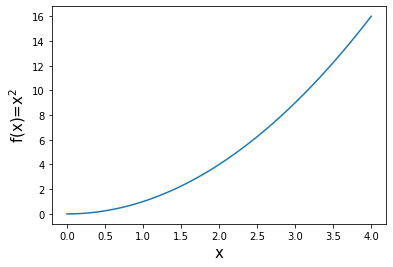

In [68]:
plt.plot(x,f_x)
plt.xlabel('x',fontsize=15)
plt.ylabel('f(x)=x$^2$',fontsize=15)
plt.show()

QUESTION:  
What is the analytical derivative of this function $f(x) = x^2$ at $x$=2 ?

Below I will write a function that calculates the numerical derivative using the forward difference method.

In [65]:
def df_dx(f_x, x, eval_x, h):
  """ 
    calc first derivative 
    Input: x, f(x), eval_x, h
    eval_x: x value at which you'd like to evaluate the derivative
    h: step size, effective step size is calculated from input h
    what to match input h to minimum h (h_min) in the x array and find appropriate h value based on this h_min
  """
  h_min = x[1] - x[0]
  #print('hmin',h_min)
  h_multiple = h//h_min
  h_dif = np.abs(h_min - h)
  #print('hdif', h_dif)
  if h < h_min:
    h_eff = h_min
  else:
    if h_dif < h_min/2:
      h_eff = h_min*h_multiple
    else:
      h_eff = h_min*(h_multiple + 1)
  #print('h_eff', h_eff)
  def nearest_x(x, eval_x):
    """ subfunction to locate nearest x value """
    x_eval_dif = np.abs(x - eval_x)
    min_val = np.min(x_eval_dif)
    min_index = np.where(min_val==x_eval_dif)[0][0]
    nearest_eval = x[min_index]
    return min_index, nearest_eval
  min_index, nearest_eval = nearest_x(x, eval_x)
  # locate nearest value for x_i+h 
  min_index_h, nearest_eval_h = nearest_x(x, eval_x+h_eff)
  f_xi = f_x[min_index]
  f_xi_h = f_x[min_index_h]
  #print(f_xi, f_xi_h)
  dfdx = ( f_xi_h - f_xi )/h_eff
  #print(dfdx)
  return dfdx


# QUESTIONS:

# Study this function and use print statements to understand what each step is doing. 
# Uncomment some of the above print statements and examine the output.

# Can you think of a better implementation?

# Can you contrain the function parameters differently to make the implementation more straightforward?

Let's evaluate the numerical derivative of our function at $x$=2 and step size h = 0.2

In [64]:
eval_x = 2
h = 0.2
numerical_derivative = df_dx(f_x, x, eval_x, h)
print('numerical_derivative of f(x) at x =', eval_x, 'and h =', h, ' is:', numerical_derivative)

numerical_derivative of f(x) at x = 2 and h = 0.2  is: 4.2424242424242475


### QUESTIONS
- How does this compare with the analytical derivative?
- What can we do to decrese the numerical error?


Print the value of the numerical derviative (FD) wiht h = 0.1

QUESTION: Create a plot of the numerical derivative versus h

In [ ]:
#code here

In [ ]:
#plot here

How can we get even small h?
- alter the code below to get an 'effective' h of 0.05


In [ ]:
# x = np.linspace(0,6,100)
# f_x = x**2
# df_dx(f_x, x, eval_x, h):

## Error analysis:
- Consider the error as a function of $h$.
- What is the minimum $f(x+h)-f(x)$ value allowed?
- Calculate the change in the error as $h$ is reduced.
- Plot your results.